<a href="https://colab.research.google.com/github/kimdongha723/kimdongha723/blob/main/python/Coin_Ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyupbit
!pip install pykrx

     |████████████████████████████████| 103 kB 7.8 MB/s 
     |████████████████████████████████| 82 kB 656 kB/s 
     |████████████████████████████████| 60 kB 6.9 MB/s 
     |████████████████████████████████| 251 kB 39.3 MB/s 


In [2]:
import pyupbit
from pykrx import stock
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

In [ ]:
# BTC 최근 200시간의 데이터 불러옴

df = pyupbit.get_ohlcv("KRW-xtz", interval="minute30")

In [ ]:
# 시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds', 'y']]

In [ ]:
#학습
#튜닝 전
# model = Prophet()
# model.fit(data)


#학습
#튜닝 후
model = Prophet(
    seasonality_mode='multiplicative',
    changepoint_prior_scale=0.5,
    changepoint_range=0.9,
)
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [ ]:
#24시간 예측
future = model.make_future_dataframe(periods=10, freq='H')

forecast = model.predict(future)

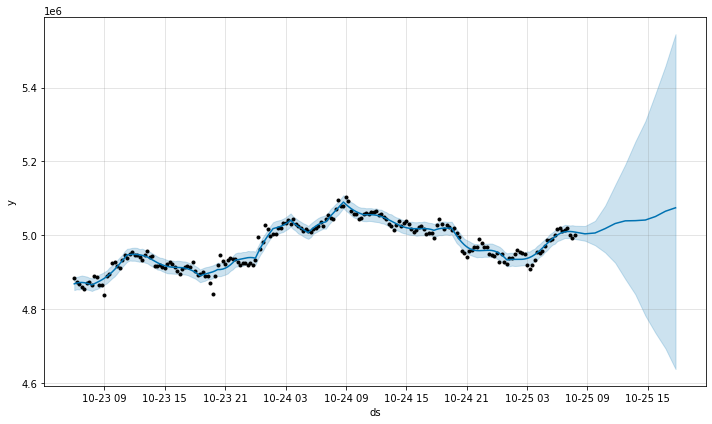

In [ ]:
# 그래프1
fig1 = model.plot(forecast)
#a = add_changepoints_to_plot(fig1.gca(), model, forecast)

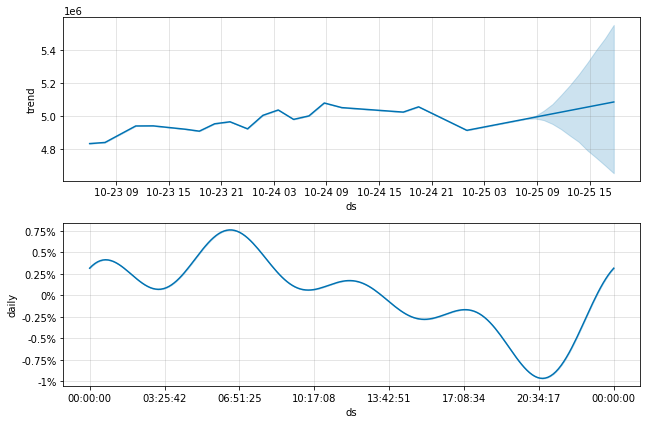

In [ ]:
# 그래프2
fig2 = model.plot_components(forecast)

In [ ]:
#가격 조회
nowValue = pyupbit.get_current_price("KRW-eth")
closeValue = forecast['yhat'].values[-1]

print("현재가 : " , nowValue)
print("24시간뒤의 가격: ", closeValue)


현재가 :  5000000.0
24시간뒤의 가격:  5066061.401504716


In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2021-10-23 06:00:00,4.829927e+06,4.849298e+06,4.885536e+06,4.829927e+06,4.829927e+06,0.008093,0.008093,0.008093,0.008093,0.008093,0.008093,0.0,0.0,0.0,4.869013e+06
1,2021-10-23 06:15:00,4.830428e+06,4.853173e+06,4.890144e+06,4.830428e+06,4.830428e+06,0.008436,0.008436,0.008436,0.008436,0.008436,0.008436,0.0,0.0,0.0,4.871179e+06
2,2021-10-23 06:30:00,4.830929e+06,4.854769e+06,4.889267e+06,4.830929e+06,4.830929e+06,0.008579,0.008579,0.008579,0.008579,0.008579,0.008579,0.0,0.0,0.0,4.872373e+06
3,2021-10-23 06:45:00,4.831430e+06,4.856066e+06,4.891100e+06,4.831430e+06,4.831430e+06,0.008519,0.008519,0.008519,0.008519,0.008519,0.008519,0.0,0.0,0.0,4.872588e+06
4,2021-10-23 07:00:00,4.831931e+06,4.854917e+06,4.888626e+06,4.831931e+06,4.831931e+06,0.008266,0.008266,0.008266,0.008266,0.008266,0.008266,0.0,0.0,0.0,4.871872e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,2021-10-25 16:45:00,5.043623e+06,4.652446e+06,5.398666e+06,4.668818e+06,5.411908e+06,-0.002122,-0.002122,-0.002122,-0.002122,-0.002122,-0.002122,0.0,0.0,0.0,5.032922e+06
209,2021-10-25 17:45:00,5.051337e+06,4.583612e+06,5.482853e+06,4.592911e+06,5.483074e+06,-0.002426,-0.002426,-0.002426,-0.002426,-0.002426,-0.002426,0.0,0.0,0.0,5.039081e+06
210,2021-10-25 18:45:00,5.059051e+06,4.509012e+06,5.544183e+06,4.530117e+06,5.565625e+06,-0.004869,-0.004869,-0.004869,-0.004869,-0.004869,-0.004869,0.0,0.0,0.0,5.034420e+06
211,2021-10-25 19:45:00,5.066765e+06,4.419172e+06,5.609754e+06,4.468623e+06,5.652178e+06,-0.008389,-0.008389,-0.008389,-0.008389,-0.008389,-0.008389,0.0,0.0,0.0,5.024262e+06
